In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('precision', 4)
pd.options.display.float_format = '{:.4f}'.format

# Statistiek voor psychologen, deel 1
# Oefeningen uit cursus - inductieve statistiek

- gebaseerd op cursus "Statistiek voor psychologen, deel 1" van I. Van Mechelen (academiejaar 2019-2020)
- voor formularia en meer oefeningen: zie <https://statistiek.vhsven.be>

## Inductieve statistiek

### Kansrekenen

- zie ook <https://setosa.io/ev/conditional-probability/>

> (p. 106) Oefening: Stel dat we als populatie de dagen van de week beschouwen. Hoeveel steekproeven van omvang 2 kan je onderscheiden? En hoeveel van omvang 4?

  - 7 dagen in een week
  - $n=2 \implies 7^2=49$ combinaties mogelijk
    - ma-ma, ma-di, ..., ma-zo, 
    - di-ma, di-di, ..., di-zo,
    - ...
    - zo-ma, zo-di, ..., zo-zo
  - $n=4 \implies 7^4=2401$ combinaties mogelijk

> (p. 108) Oefening: Stel dat we opnieuw de populatie van alle weekdagen beschouwen. Wat is het verschil tussen de verzameling van alle steekproeven met omvang $n=2$ met vs. zonder teruglegging?

  - 7 dagen in een week
  - $n=2$
  - met teruglegging: zie hierboven
  - zonder teruglegging
    - ma-ma, di-di, ... onmogelijk
    - 7 minder
    - $7^2 - 7 = 7 \cdot 6 = 42$

> (p. 109) Oefening: Hoe zit dit alles bij steekproeftrekking zonder teruglegging en waarom?

  - zonder teruglegging
    - kan eenzelfde element uit de populatie in eenzelfde steekproef maar eenmaal voorkomen
      - per definitie
    - moet $n \leq N$
      - want je kan niet meer elementen trekken dan er beschikbaar zijn
    - verandert de populatiesamenstelling
      - want bij elke trekking een element minder

> (p. 110) Oefening: Trek met behulp van je rekenmachine uit een klas met 30 leerlingen een steekproef van 10 leerlingen zonder teruglegging en op een dusdanige manier dat elke geordende deelverzameling van 10 verschillende leerlingen evenveel kans heeft om als steekproef getrokken te worden

  - "op een dusdanige manier dat ..." $\implies$ ZTW
  - `randint(1,30)` via rekentoestel
  - `enter` tot je 10 verschillende rangnummers hebt
  - 5, 30, 24, 9, 20, 17, 19, 7, 14, 4

In [8]:
studentennummers = range(1, 30)
np.random.choice(studentennummers, size=10, replace=False)

array([11, 16, 20,  4, 28, 24, 17,  2, 14, 22])

> (p. 111) Oefening: Genereer met je rekenmachine tweemaal dezelfde sequens van 8 gehele toevalsgetallen tussen 20 en 40.

  - `0 sto->rand`
  - `randint(20,40)` x8
  - 20, 35, 33, 24, 27, 40, 39, 26
  - `0 sto->rand`
  - `randint(20,40)` x8
  - 20, 35, 33, 24, 27, 40, 39, 26

In [11]:
result1 = np.random.RandomState(seed=0).random_integers(low=20, high=40, size=8)
result2 = np.random.RandomState(seed=0).random_integers(low=20, high=40, size=8)
result1, result2

(array([32, 35, 20, 23, 23, 27, 29, 39]),
 array([32, 35, 20, 23, 23, 27, 29, 39]))

> (p. 112) Oefening: Is gestratificeerde steekproeftrekking een procedure van trekking op ZTW? Waarom (niet)?

  - stratificatie $\neq$ ZTW
    - want niet elke geordende steekproef heeft evenveel kans

![xkcd-1132](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

> (p. 122) Oefeningen:
> - Waaraan is in het Chrysostomosvoorbeeld van p. 120 $P(A \mid B^\complement)$ gelijk? En $P(A^\complement \mid B)$? En $P(B \mid A)$?
> - Bewijs dat in het algemeen geldt dat: $P(A^\complement \mid B) = 1 - P(A \mid B)$.
> - Stel dat men een worp doet met 2 eerlijke dobbelstenen. Wat is P(bij tweede dobbelsteen liggen 6 ogen boven | het totaal aantal ogen dat bovenligt bij de twee dobbelstenen is 8)?

  - Chrysostomosvoorbeeld
    - gegeven
      - bivariate frequentietabel
      - $P(A) \approx 0.32$
      - $P(B) \approx 0.43$
      - $P(A \mid B) \approx 0.58$
    - $P(A \mid B^\complement)$
      - optie 1
        - $= \frac{10}{20+10+10+10+10+20}$
        - $= \frac{10}{80}$
        - $= 0.125$
      - optie 2 (vergezocht)
        - $= \frac{P(A \cap B^\complement)}{P(B^\complement)}$
        - $= \frac{P(A) P(A \cap B^\complement)}{P(A) P(B^\complement)}$
        - $= \frac{P(A)}{P(B^\complement)} P(B^\complement \mid A)$ (dit hadden we met Bayes in 1 stap kunnen doen)
        - $= \frac{P(A)}{1 - P(B)} P(B^\complement \mid A)$
        - $= \frac{P(A)}{1 - P(B)} (1 - P(B \mid A))$
        - $\approx \frac{0.32}{1 - 0.43} (1 - 0.7794)$ (zie oplossing hieronder)
        - $\approx 0.1238$
    - $P(A^\complement \mid B)$
      - optie 1
        - $= \frac{10+10+5}{20+10+5+10+10+5}$
        - $= \frac{25}{60}$
        - $\approx 0.4167$
      - optie 2
        - $= 1 - P(A \mid B)$
        - $\approx 1 - 0.58$
        - $\approx 0.42$
    - $P(B \mid A)$
      - optie 1
        - $= \frac{20+5+10}{20+5+10+10}$
        - $= \frac{35}{45}$
        - $\approx 0.7778$
      - optie 2
        - $= \frac{P(A \cap B)}{P(A)}$
        - $= \frac{P(A \mid B) P(B)}{P(A)}$
        - $\approx \frac{0.58 \cdot 0.43}{0.32}$
        - $\approx 0.7794$
  - $P(A^\complement \mid B) = 1 - P(A \mid B)$
    - $\iff \frac{P(A^\complement \cap B)}{P(B)} = 1 - \frac{P(A \cap B)}{P(B)}$ (definitie voorwaardelijke kans)
    - $\iff P(A^\complement \cap B) = P(B) - P(A \cap B)$
    - $\iff P(A^\complement \cap B) + P(A \cap B) = P(B)$
    - $\iff P((A^\complement \cap B) \cup (A \cap B)) = P(B)$ (disjunct)
    - $\iff P(B) = P(B)$
  - $P(A \mid B)$
    - $A$: 2e dobbelsteen 6
    - $B$: totaal 8
      - 6+2
      - 5+3
      - 4+4
      - 3+5
      - 2+6
    - $P(A) = \frac{1}{6}$
    - $P(B) = \frac{5}{6^2}$ (5 manier van hierboven)
    - $P(A \cap B) = \frac{1}{6^2}$ (enkel 2+6)
    - $P(A \mid B) = \frac{P(A \cap B)}{P(B)} = \frac{1}{5} = 0.2$

![xkcd-2059](https://imgs.xkcd.com/comics/modified_bayes_theorem.png)

> (p. 124) Oefening 1: Stel dat men in het bovenstaande voorbeeld een jongere moet onderzoeken waarvan men niet alleen weet dat hij bij een motorongeval betrokken was maar ook dat hij daarbij geen helm droeg. Stel dat we verder weten dat in een dergelijk geval het risico op hersenbeschadiging $P(B)$ gelijk is aan $0.60$. Wat is in dit geval $P(B \mid A)$? Moeten we bij de berekening van deze kans welbepaalde veronderstellingen maken?

  - gegeven
    - $A$: onvoldoende op aandachtstest
    - $B$: hersenbeschadiging
    - $P(B) = 0.40$
      - geen helm $\implies P(B) = 0.60$
    - $P(A \mid B) = 0.60$
    - $P(A \mid B^\complement) = 0.20$
  - $P(A)$
    - $= P(A \mid B)P(B) + P(A \mid B^\complement)P(B^\complement)$
    - zonder helm
      - $= 0.60 \cdot 0.60 + 0.20 \cdot (1 - 0.60)$
      - $= 0.44$
    - met helm
      - $= 0.60 \cdot 0.40 + 0.20 \cdot (1 - 0.40)$
      - $= 0.36$
  - $P(B \mid A)$
    - $= \frac{P(A \mid B)P(B)}{P(A)}$
    - $= \frac{0.60 \cdot 0.60}{0.44}$
    - $\approx 0.8182$
  - veronderstellingen
    - $P(A \mid B)$ en $P(A \mid B^\complement)$ onveranderd zonder helm

> (p. 124) Oefening 2: Wat is in het bovenstaande voorbeeld de betekenis van $P(B \mid A^\complement)$? Ga verder zowel voor het algemene geval als voor het geval zonder helm na wat de waarde is van $P(B \mid A^\complement)$.

  - $P(B \mid A^\complement)$
    - kans op hersenbeschadiging indien voldoende score op aandachtstest
    - $= \frac{P(A^\complement \mid B)P(B)}{P(A^\complement)}$ (Bayes)
    - $= \frac{(1 - P(A \mid B))P(B)}{1 - P(A)}$
    - zonder helm: $P(B) = 0.60$
      - $= \frac{(1 - 0.60) 0.60}{1 - 0.44}$
      - $\approx 0.4286$
    - met helm: $P(B) = 0.40$
      - $= \frac{(1 - 0.60) 0.40}{1 - 0.36}$
      - $= 0.25$

> (p. 125) Bewijs van al deze equivalenties: oefening.

  - $(1) \iff (3)$
    - $P(A \mid B) = P(A)$
      - $\iff \frac{P(A \cap B)}{P(B)} = P(A)$ (definitie)
      - $\iff P(A \cap B) = P(A) P(B)$
  - $(1) \iff (2)$
    - $P(A \mid B) = P(A)$
      - $\iff \frac{P(A \cap B)}{P(B)} = P(A)$ (definitie)
      - $\iff \frac{P(A \cap B)}{P(A)} = P(B)$
      - $\iff P(B \mid A) = P(B)$ (definitie)
  - $(3) \iff (2)$
    - $P(A \cap B) = P(A)P(B)$
    - $\iff \frac{P(A \cap B)}{P(A)} = \frac{P(A)P(B)}{P(A)}$
    - $\iff P(B \mid A) = P(B)$ (definitie)

![xkcd-795](https://imgs.xkcd.com/comics/conditional_risk.png)

> (p. 125) Oefening 1: Beschouw in het bovenstaande dobbelstenen-voorbeeld
> - $A$ = "bij de eerste dobbelsteen liggen zes ogen boven"
> - $C$ = "de som van het aantal ogen dat boven ligt is negen"
> - $D$ = "de som van het aantal ogen dat boven ligt is zeven".
> - Zijn $A$ en $C$ statistisch onafhankelijk?
> - Zijn $A$ en $D$ statistisch onafhankelijk?

  - $P(A) = \frac{1}{6}$
  - $P(C) = \frac{4}{6^2} = \frac{1}{9}$
    - 6+3, 5+4, 4+5, 3+6
  - $P(D) = \frac{6}{6^2} = \frac{1}{6}$
    - 6+1, 5+2, 4+3, 3+4, 2+5, 1+6
  - $P(A \cap C) = \frac{1}{6^2} \neq P(A)P(C)$
    - 6+3
    - afhankelijk
    - als het totaal aantal ogen 9 is, is de kans dat de eerste dobbelsteen 6 rolde groter dan 1/6
  - $P(A \cap D) = \frac{1}{6^2} = P(A)P(D)$
    - onafhankelijk
    - als het totaal aantal ogen 7 is, is de kans dat de eerste dobbelsteen 6 rolde nog altijd 1/6

> (p. 125) Oefening 2: Zijn in het Chrysostomosvoorbeeld van p. 120 $A$ = "geslaagd in eerste bach" en $B$ = "Chrysostomosscore $\geq 10$" statistisch onafhankelijk?

  - gegeven
    - $P(A) = \frac{45}{140}$
    - $P(B) = \frac{60}{140}$
    - $P(A \mid B) = \frac{35}{60}$
  - $P(A \mid B) \neq P(A)$
    - afhankelijk

> (p. 126) Voorbeeld: Stel dat een eerlijk muntstuk tweemaal wordt opgegooid. Stel dat
> - $A$ = "kruis bij eerste worp"
> - $B$ = "kruis bij tweede worp"
> - $C$ = "bij twee worpen is er precies 1x kruis".
> Er kan gemakkelijk worden nagegaan (oefening!) dat $A,B$ $A,C$ en $B,C$ paarsgewijs statistisch onafhankelijk zijn, maar dat $P(A \cap B \cap C) \neq P(A) \times P(B) \times P(C)$.

  - $P(A) = P(B) = \frac{1}{2}$
  - $P(C) = \frac{2}{4}$
    - KM, MK
  - $P(A \cap B) = \frac{1}{4} = P(A)P(B)$
    - KK
    - onafhankelijk
  - $P(A \cap C) = \frac{1}{4} = P(A)P(C)$
    - KM
    - onafhankelijk
  - $P(B \cap C) = \frac{1}{4} = P(A)P(C)$
    - MK
    - onafhankelijk
  - $P(A \cap B \cap C) = \frac{0}{4} \neq P(A)P(B)P(C)$
    - mutueel afhankelijk

### Univariaat

> (p. 139) Oefening: Bepaal de functie $\pi$ voor de toevalsvariabelen 'aantal keren kruis' voor het geval waarin 1 eerlijk geldstuk telkens 6 maal (resp. 20 maal) wordt getost.

- $\pi(k) = \binom{n}{k} 0.5^k 0.5^{n-k} = \binom{n}{k} 0.5^n$
- $n=6, k=2$
  - $\pi(2) = \binom{6}{2} 0.5^6 \approx 0.2344$
- $n=20, k=2$
  - $\pi(2) = \binom{20}{2} 0.5^20 \approx 0.00018$
      
> (p. 140) Oefening: Bepaal de rest van de $\pi$-functie voor voorbeeld 1b.

- oneerlijk muntstuk: $P(K) = 0.70$
- $\pi(k) = \binom{n}{k} 0.7^k 0.3^{n-k}$
- $n = 3$
  - $\pi(0) = \binom{3}{0} 0.7^0 0.3^3 = 0.027$
  - $\pi(1) = \binom{3}{1} 0.7^1 0.3^2 = 0.189$
  - $\pi(2) = \binom{3}{2} 0.7^2 0.3^1 = 0.441$
  - $\pi(3) = \binom{3}{3} 0.7^3 0.3^0 = 0.343$

> (p. 140) Op een analoge manier kunnen we uitdrukkingen afleiden voor de rest van de $\pi$-functie (oefening).

- algemeen: $P(K) = \theta$
- $\pi(k) = \binom{n}{k} \theta^k (1-\theta)^{n-k}$
- cf. binomiale verdeling (statistiek 2)

> (p. 141) Oefening: Hoe ziet de $\pi$-functie in het bovenstaande voorbeeld eruit als er geworpen wordt met een oneerlijk muntstuk waarvan P(kruis) onbekend is?

  - $\pi(k) = (1-\theta)^{k-1}\theta$
  - cf. geometrische verdeling (statistiek 2)

>  (p. 145) Oefening: Maak een analoge tabel en grafiek op voor voorbeeld 2 op p. 140 (tot $x=4$).

- $\pi(k) = (\frac{1}{2})^{k-1} \cdot \frac{1}{2} = \frac{1}{2^k}$

| $k$ | $\pi(k)$ | $\Phi(k)$ |
|-----|----------|-----------|
| $1$ | $\frac{1}{2}$ | $\frac{1}{2}$
| $2$ | $\frac{1}{4}$ | $\frac{3}{4}$
| $3$ | $\frac{1}{8}$ | $\frac{7}{8}$
| $4$ | $\frac{1}{16}$| $\frac{15}{16}$

- dus $\Phi(k) = 1 - \frac{1}{2^k}$
- TODO grafiek

> (p. 149-150) Bekijken we verder nog even de totale oppervlakte onder de dichtheidsfunctie, welke we kunnen noteren als $\int_{-\infty}^{+\infty} \phi(x)dx$; deze oppervlakte is in ons voorbeeld gelijk aan 1 (reken na!).

- driehoek 1: $0.25$ (gegeven)
- driehoek 2: $0.25$ (even groot)
- rechthoek: $0.2 \cdot 2.5 = 0.50$
- totaal: $0.25 + 0.25 + 0.50 = 1$

> (p. 155) Oefening: Reken zelf vanuit de dichtheidsfunctie van dit voorbeeld de waarden van $\Phi(0.50)$, $\Phi(0.70)$ en $\Phi(0.90)$ na.

  - $\Phi(0.50) = 0$
  - $\Phi(0.70) = \frac{0.1 \cdot 1.25}{2} = 0.0625$
    - linkerhelft driehoek 1
  - $\Phi(0.90) = 0.25 + \frac{0.50}{2} = 0.50$
    - driehoek 1 + helft rechthoek
    - double check: $0.90$ is inderdaad het midden van de symmetrische grafiek

> (p. 157) Oefeningen:
> - Bereken $\mu_X$ voor voorbeeld 1b van p. 140.
> - Toon aan dat in voorbeeld 1c van p. 140 geldt dat $\mu_X = 3\theta$

  - $\pi_X(k) = \binom{3}{k} 0.7^k 0.3^{3-k}$
  - $\mu_X$
    - $= \sum_j x_j \pi_X(x_j)$
    - $= 0 \cdot 0.027 + 1 \cdot 0.189 + 2 \cdot 0.441 + 3 \cdot 0.343$
    - $= 2.1$
  - $\pi(k) = \binom{3}{k} \theta^k (1-\theta)^{3-k}$
  - $\mu_X$
    - $= \sum_j x_j \pi_X(x_j)$
    - $= \sum_j x_j \binom{3}{x_j} \theta^{x_j} (1-\theta)^{3-x_j}$
    - $= 0 \cdot \binom{3}{0} \theta^{0} (1-\theta)^{3} + 1 \cdot \binom{3}{1} \theta^{1} (1-\theta)^{2} + 2 \cdot \binom{3}{2} \theta^{2} (1-\theta)^{1} + 3 \cdot \binom{3}{3} \theta^{3} (1-\theta)^{0}$
    - $= 0 + 3\theta (1-\theta)^{2} + 6\theta^{2} (1-\theta) + 3 \theta^3$
    - $=3\theta(1 - 2\theta + \theta^2) + 6\theta^2 - 6\theta^3 + 3\theta^3$
    - $=3\theta - 6\theta^2 + 3\theta^3 + 6\theta^2 - 6\theta^3 + 3\theta^3$
    - $=3\theta$

> (p. 161) Het bewijs van deze twee eigenschappen en deze stelling, beperkt tot het geval van een toevalsvariabele met een eindig waardengebied, laten we als oefening.

  - $E[X - \mu_X]$ (cf. bewijs p. 27)
    - $= \sum_j (x_j - \mu_X) \pi_X(x_j)$ (definitie verwachte waarde)
    - $= \sum_j x_j \pi_X(x_j) - \sum_j \mu_X \pi_X(x_j)$ (splits som)
    - $= \mu_X - \sum_j \mu_X \pi_X(x_j)$ (definitie gemiddelde)
    - $= \mu_X - \mu_X \sum_j \pi_X(x_j)$ (constante factor buiten)
    - $= \mu_X - \mu_X$ (eigenschap kansmassafunctie)
    - $= 0$
  - $c \neq \mu_X \implies E[(X-\mu_X)^2] < E[(X-c)^2]$
    - $E[(X-c)^2]$
    - $= E[(X - \mu_X)^2] + (\mu_X - c)^2$ (Steiner)
    - $> E[(X-\mu_X)^2]$ (als $c \neq \mu_X$)
  - $E[(X-c)^2]$ (cf bewijs p. 38)
    - $\sum_j (x_j - c)^2 \pi_X(x_j)$ (definitie verwachte waarde)
    - $\sum_j ((x_j - \mu_X) + (\mu_X - c))^2 \pi_X(x_j)$ (sneaky trick)
    - $\sum_j [(x_j - \mu_X)^2 + 2(x_j - \mu_X)(\mu_X - c) + (\mu_X - c)^2] \pi_X(x_j)$ (merkwaardig product)
    - $\sum_j (x_j - \mu_X)^2 \pi_X(x_j) + 2\sum_j (x_j - \mu_X)(\mu_X - c) \pi_X(x_j) + \sum_j(\mu_X - c)^2 \pi_X(x_j)$ (splits som)
    - $\sum_j (x_j - \mu_X)^2 \pi_X(x_j) + 2(\mu_X - c)\sum_j (x_j - \mu_X) \pi_X(x_j) + (\mu_X - c)^2 \sum_j \pi_X(x_j)$ (constante factoren buiten)
    - $\sum_j (x_j - \mu_X)^2 \pi_X(x_j) + 2(\mu_X - c)\sum_j (x_j - \mu_X) \pi_X(x_j) + (\mu_X - c)^2$ (eigenschap kansmassafunctie)
    - $E[(X - \mu_X)^2] + 2(\mu_X - c)E[X - \mu_X] + (\mu_X - c)^2$ (definitie verwachte waarde)
    - $E[(X - \mu_X)^2] + 2(\mu_X - c) \cdot 0 + (\mu_X - c)^2$ (eigenschap gemiddelde)
    - $E[(X - \mu_X)^2] + (\mu_X - c)^2$

> (p. 163) Het bewijs van de eerste eigenschap, beperkt tot het geval van een toevalsvariabele met een eindig waardengebied, laten we opnieuw als oefening, op te lossen na sectie II.1.3.

  - $\sigma_X^2$ (cf. bewijs p. 40)
  - $= E[(X-\mu_X)^2]$ (definitie variantie)
  - $= \sum_j (x_j-\mu_X)^2 \pi_X(x_j)$ (definitie verwachte waarde)
  - $= \sum_j (x_j^2 - 2x_j\mu_X +\mu_X^2) \pi_X(x_j)$ (merkwaardig product)
  - $= \sum_j x_j^2 \pi_X(x_j) - 2\mu_X\sum_j x_j \pi_X(x_j) + \mu_X^2\sum_j  \pi_X(x_j)$ (splits som)
  - $= \sum_j x_j^2 \pi_X(x_j) - 2\mu_X\sum_j x_j \pi_X(x_j) + \mu_X^2$ (eigenschap kansmassafunctie)
  - $= E[X^2] - 2\mu_X\sum_j x_j \pi_X(x_j) + \mu_X^2$ (definitie verwachte waarde)
  - $= E[X^2] - 2\mu_X^2 + \mu_X^2$ (definitie gemiddelde)
  - $= E[X^2] - \mu_X^2$

> (p. 165) Bewijs: oefening.

  - $\mu_{\zeta_X}$ (cf. bewijs p. 52)
    - $= \sum_j \frac{x_j - \mu_X}{\sigma_X} \pi_X(x_j)$ (definitie gemiddelde + zeta-transformatie)
    - $= \frac{1}{\sigma_X} \sum_j (x_j - \mu_X) \pi_X(x_j)$ (constante factor buiten)
    - $= \frac{1}{\sigma_X} [\sum_j x_j \pi_X(x_j) - \sum_j \mu_X \pi_X(x_j)]$ (splits som)
    - $= \frac{1}{\sigma_X} [\mu_X - \mu_X \sum_j \pi_X(x_j)]$ (definitie gemiddelde)
    - $= \frac{1}{\sigma_X} [\mu_X - \mu_X]$ (eigenschap kansmassafunctie)
    - $= 0$
  - $\sigma_{\zeta_X}^2$ (cf. bewijs p. 53)
    - $=E[(\zeta_X - \mu_{\zeta_X})^2]$ (definitie variantie)
    - $=E[\zeta_X^2]$ (want $\mu_{\zeta_X} = 0$)
    - $= \sum_j (\frac{x_j - \mu_X}{\sigma_X})^2 \pi_X(x_j)$ (definitie verwachte waarde + zeta-transformatie)
    - $= \frac{1}{\sigma_X^2} \sum_j (x_j - \mu_X)^2 \pi_X(x_j)$ (constante factor buiten)
    - $= \frac{1}{\sigma_X^2} E[(X - \mu_X)^2]$ (definitie verwachte waarde)
    - $= \frac{1}{\sigma_X^2} \sigma_X^2$ (definitie variantie)
    - $= 1$

### Bivariaat

> (p. 169) Oefening 1: Reken de bivariate en marginale kansmassafuncties van voorbeeld 1 op p. 166 opnieuw uit, maar nu voor het geval van een oneerlijk muntstuk.
> - (1a) veronderstel P(kruis) = 0.70
> - (1b) veronderstel P(kruis) is vast maar onbekend (noem deze $\theta$).

- $X$: aantal kruis
- $Y$: aantal wisselingen
- $n = 3$
- logica van aantal wisselingen verandert hier niet

| $X$ | combinatie | $Y$ | $\pi_{Y \mid X=x}$ |
|-----|------------|-----|--------------------|
| $0$ | MMM        | $0$ | $1$
| $0$ | -          | $1$ | $0$
| $0$ | -          | $2$ | $0$
| $1$ | -          | $0$ | $0$
| $1$ | KMM, MMK   | $1$ | $\frac{2}{3}$
| $1$ | MKM        | $2$ | $\frac{1}{3}$
| $2$ | -          | $0$ | $0$
| $2$ | MKK, KKM   | $1$ | $\frac{2}{3}$
| $2$ | KMK        | $2$ | $\frac{1}{3}$
| $3$ | KKK        | $0$ | $1$
| $3$ | -          | $1$ | $0$
| $3$ | -          | $2$ | $0$

- (1a) $P(K) = \theta = 0.70$
    - $\pi_X(x) = \binom{3}{x} 0.70^x 0.30^{3-x}$
    - $\pi_{X,Y}(x,y) = \pi_{Y \mid X=x}(y) \pi_X(x)$
    - berekeningen: zie (1b)
    
| $X$ | $Y=0$ | $Y=1$ | $Y=2$ | $\pi_X$ |
|-----|-------|-------|-------|-----------|
| $3$ | $0.343$|$0$|  $0$  | $0.343$
| $2$ |  $0$  | $0.294$ | $0.147$ | $0.441$
| $1$ |  $0$  | $0.126$ | $0.063$ | $0.189$
| $0$ | $0.027$ | $0$ | $0$ | $0.027$
| $\pi_Y$ | $0.37$ | $0.42$ | $0.21$ | $1$
    
- (1b) $P(K) = \theta$
    - $\pi_X(x) = \binom{n}{x} \theta^x (1-\theta)^{n-x}$
    - $\pi_{X,Y}(x,y) = \pi_{Y \mid X=x}(y) \pi_X(x)$
    
| $X$ | $Y=0$ | $Y=1$ | $Y=2$ | $\pi_X$ |
|-----|-------|-------|-------|---------|
| $3$ | $\theta^3$|$0$|  $0$  | $\theta^3$ |
| $2$ |  $0$  | $2\theta^2 (1-\theta)$ | $\theta^2 (1-\theta)$ | $3\theta^2 (1-\theta)$ |
| $1$ |  $0$  | $2\theta (1-\theta)^2$ | $\theta (1-\theta)^2$ | $3\theta (1-\theta)^2$ |
| $0$ | $(1-\theta)^3$ | $0$ | $0$ | $(1-\theta)^3$ |
| $\pi_Y$ | $\theta^3 + (1-\theta)^3$ | $2\theta^2 (1-\theta) + 2\theta (1-\theta)^2$ | $\theta^2 (1-\theta) + \theta (1-\theta)^2$ | $1$ |

> (p. 169) Oefening 2: Twee spelers werpen elk om ter hoogst met een eerlijke dobbelsteen. Definieer de volgende toevalsvariabelen:
> - $X$: aantal ogen geworpen door speler 1
> - $Y$: resultaat van het spel (1 = speler 1 gewonnen, 0 = onbeslist, -1 = speler 2 gewonnen).
> 
> Bereken de bivariate en marginale kansmassafuncties voor $(X,Y)$.

  - $X_2$: ogen P2 (verborgen variabele)
  - methode 1
    - maak tabel van combinaties $X$, $X_2$, $Y$
    - $6^2 = 36$ rijen
    - alle rijen hebben evenveel kans: $\frac{1}{6^2}$
    - maak a.h.v. daarvan $\pi_{X,Y}$ ($6 \times 3 = 18$ combinaties)
    - bereken daaruit  $\pi_X$ en $\pi_Y$
  - methode 2
    - $X$
      - $\pi_X = \frac{1}{6}$
    - $Y$
      - gelijk
        - 1-1, 2-2, 3-3, 4-4, 5-5, 6-6
      - ieder heeft evenveel kans om te winnen: $\frac{36-6}{2} = 15$ keer
      - dus
        - $\pi_Y(-1) = \frac{15}{6^2}$
        - $\pi_Y(0) = \frac{6}{6^2} = \frac{1}{6}$
        - $\pi_Y(1) = \frac{15}{6^2}$
    - gecombineerd
      - bij gelijkspel hebben alle $X$ waarden evenveel kans
        - $\pi_{X,Y}(x,0) = \frac{1}{36}$
      - $\pi_{X,Y}(1,1) = 0$ (P1 kan nooit winnen met $1$)
      - $\pi_{X,Y}(1,-1) = \pi_X(1) - \pi_{X,Y}(1,0) - \pi_{X,Y}(1,1) = \frac{1}{6} - \frac{1}{36} - 0 = \frac{5}{36}$ (som moet kloppen)
      - $\pi_{X,Y}(6,-1) = 0$ (P1 kan nooit verliezen met $6$)
      - $\pi_{X,Y}(6,1) = \pi_X(6) - \pi_{X,Y}(6,0) - \pi_{X,Y}(6,-1) = \frac{1}{6} - \frac{1}{36} - 0 = \frac{5}{36}$ (som moet kloppen)
      - $\pi_{X,Y}(2,1) = \frac{1}{36}$ (P1 kan alleen winnen met 2-1)
      - $\pi_{X,Y}(2,-1) = \frac{4}{36}$ (som moet kloppen)
      - $\pi_{X,Y}(5,-1) = \frac{1}{36}$ (P1 kan alleen verliezen met 5-6)
      - $\pi_{X,Y}(5,1) = \frac{4}{36}$ (som moet kloppen)
      - vanaf dit punt is de trend duidelijk zichtbaar
      - $\pi_{X,Y}(x,-1) = \frac{6-x}{36}$
      - $\pi_{X,Y}(x,0) = \frac{1}{36}$
      - $\pi_{X,Y}(x,1) = \frac{x-1}{36}$

> (p. 169-170) Oefening 3: Trek zonder teruglegging drie kralen uit een urne met daarin 4 rode (R), 5 gele (Y) en 2 groene (G) kralen. Definieer de volgende toevalsvariabelen:
> - $X$: aantal getrokken rode kralen
> - $Y$: aantal getrokken gele kralen
> 
> Bepaal de bivariate en marginale kansmassafuncties van $X$ en $Y$.


  | kralen |$X$|$Y$| kans |
  |--------|---|---|-------------|
  | RRR    | 3 | 0 | $\frac{4}{11} \frac{3}{10} \frac{2}{9} = \frac{24}{990}$
  | RRY    | 2 | 1 | $\frac{4}{11} \frac{3}{10} \frac{5}{9} = \frac{60}{990}$
  | RYR    | 2 | 1 | $\frac{4}{11} \frac{3}{10} \frac{5}{9} = \frac{60}{990}$
  | YRR    | 2 | 1 | $\frac{4}{11} \frac{3}{10} \frac{5}{9} = \frac{60}{990}$
  | RRG    | 2 | 0 | $\frac{4}{11} \frac{3}{10} \frac{2}{9} = \frac{24}{990}$
  | RGR    | 2 | 0 | $\frac{4}{11} \frac{3}{10} \frac{2}{9} = \frac{24}{990}$
  | GRR    | 2 | 0 | $\frac{4}{11} \frac{3}{10} \frac{2}{9} = \frac{24}{990}$
  | RYY    | 1 | 2 | $\frac{4}{11} \frac{5}{10} \frac{4}{9} = \frac{80}{990}$
  | YRY    | 1 | 2 | $\frac{4}{11} \frac{5}{10} \frac{4}{9} = \frac{80}{990}$
  | YYR    | 1 | 2 | $\frac{4}{11} \frac{5}{10} \frac{4}{9} = \frac{80}{990}$
  | RYG    | 1 | 1 | $\frac{4}{11} \frac{5}{10} \frac{2}{9} = \frac{40}{990}$
  | RGY    | 1 | 1 | $\frac{4}{11} \frac{5}{10} \frac{2}{9} = \frac{40}{990}$
  | YRG    | 1 | 1 | $\frac{4}{11} \frac{5}{10} \frac{2}{9} = \frac{40}{990}$
  | YGR    | 1 | 1 | $\frac{4}{11} \frac{5}{10} \frac{2}{9} = \frac{40}{990}$
  | GRY    | 1 | 1 | $\frac{4}{11} \frac{5}{10} \frac{2}{9} = \frac{40}{990}$
  | GYR    | 1 | 1 | $\frac{4}{11} \frac{5}{10} \frac{2}{9} = \frac{40}{990}$
  | RGG    | 1 | 0 | $\frac{4}{11} \frac{2}{10} \frac{1}{9} = \frac{8}{990}$
  | GRG    | 1 | 0 | $\frac{4}{11} \frac{2}{10} \frac{1}{9} = \frac{8}{990}$
  | GGR    | 1 | 0 | $\frac{4}{11} \frac{2}{10} \frac{1}{9} = \frac{8}{990}$
  | YYY    | 0 | 3 | $\frac{5}{11} \frac{4}{10} \frac{3}{9} = \frac{60}{990}$
  | YYG    | 0 | 2 | $\frac{5}{11} \frac{4}{10} \frac{2}{9} = \frac{40}{990}$
  | YGY    | 0 | 2 | $\frac{5}{11} \frac{4}{10} \frac{2}{9} = \frac{40}{990}$
  | GYY    | 0 | 2 | $\frac{5}{11} \frac{4}{10} \frac{2}{9} = \frac{40}{990}$
  | YGG    | 0 | 1 | $\frac{5}{11} \frac{2}{10} \frac{1}{9} = \frac{10}{990}$
  | GYG    | 0 | 1 | $\frac{5}{11} \frac{2}{10} \frac{1}{9} = \frac{10}{990}$
  | GGY    | 0 | 1 | $\frac{5}{11} \frac{2}{10} \frac{1}{9} = \frac{10}{990}$
  | totaal | - | - | $\frac{990}{990}$

  - bivariate kansmassafunctie
    - $\pi_{X,Y}(3,0) = \frac{24}{990} \approx 0.0242$
    - $\pi_{X,Y}(2,1) = \frac{3 \cdot 60}{990} \approx 0.1818$
    - ...
  - marginale kansmassafuncties
    - $\pi_X(0) = \frac{60 + 3 \cdot 40 + 3 \cdot 10}{990} = \frac{210}{990} \approx 0.2121$
    - $\pi_X(1) = \frac{3 \cdot 80 + 6 \cdot 40 + 3 \cdot 8}{990} = \frac{504}{990} \approx 0.5091$
    - $\pi_X(2) = \frac{3 \cdot 60 + 3 \cdot 24}{990} = \frac{252}{990} \approx 0.2546$
    - $\pi_X(3) = \frac{24}{990} \approx 0.0242$
    - $\pi_Y(0) = \frac{4 \cdot 24 + 3 \cdot 8}{990} = \frac{120}{990} \approx 0.1212$
    - $\pi_Y(1) = \frac{3 \cdot 60 + 6 \cdot 40 + 3 \cdot 10}{990} = \frac{450}{990} \approx 0.4546$
    - $\pi_Y(2) = \frac{3 \cdot 80 + 3 \cdot 40}{990} = \frac{360}{990} \approx 0.3636$
    - $\pi_Y(3) = \frac{60}{990} \approx 0.0606$

> (p. 174) Oefening 1: Bereken de twee types conditionele kansmassafuncties voor de variabelen $(X,Y)$ van voorbeeld 1 op p. 166 met het muntstuk. Teken het lijndiagram van al deze functies.

- $X$: aantal kruis
- $Y$: aantal wisselingen
- gegeven: $\pi_{X,Y}$

| $X$ | $Y=0$ | $Y=1$ | $Y=2$ | rijtotaal |
|-----|-------|-------|-------|-----------|
| $3$ | $1/8$|$0$|  $0$  | $1/8$
| $2$ |  $0$  | $2/8$ | $1/8$ | $3/8$
| $1$ |  $0$  | $2/8$ | $1/8$ | $3/8$
| $0$ | $1/8$ | $0$ | $0$ | $1/8$
| kolomtotaal | $2/8$ | $4/8$ | $2/8$ | $1$
    
- $\pi_{Y \mid X=x_j}(y) = \frac{\pi_{X,Y}(x_j, y)}{\pi_X(x_j)}$
  
| $X$ | $Y=0$ | $Y=1$ | $Y=2$ | rijtotaal |
|-----|-------|-------|-------|-----------|
| $3$ | $1$|$0$|  $0$  | $1$
| $2$ |  $0$  | $2/3$ | $1/3$ | $1$
| $1$ |  $0$  | $2/3$ | $1/3$ | $1$
| $0$ | $1$ | $0$ | $0$ | $1$

- $\pi_{X \mid Y=y_{j'}}(x) = \frac{\pi_{X,Y}(x, y_{j'})}{\pi_Y(y_{j'})}$

| $X$ | $Y=0$ | $Y=1$ | $Y=2$ |
|-----|-------|-------|-------|
| $3$ | $1/2$|$0$|  $0$
| $2$ |  $0$  | $1/2$ | $1/2$
| $1$ |  $0$  | $1/2$ | $1/2$
| $0$ | $1/2$ | $0$ | $0$
| kolomtotaal | $1$ | $1$ | $1$

Text(0.5, 1.0, '$\\pi_{Y \\mid X=3}$')

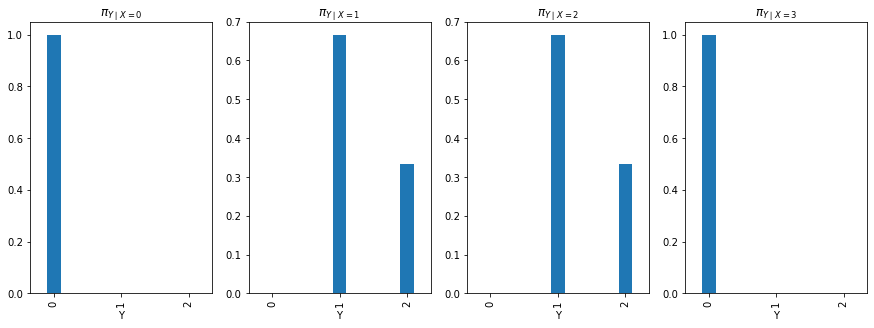

In [62]:
df = pd.DataFrame({
    'X': [0,1,2,3,0,1,2,3,0,1,2,3],
    'Y': [0,0,0,0,1,1,1,1,2,2,2,2],
    '$\pi_{Y \mid X}$': [1,0,0,1, 0,2/3,2/3,0, 0,1/3,1/3,0]
})

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
df[df['X'] == 0].drop('X', axis=1).plot(ax=axs[0], kind='bar', width=0.2, x='Y', legend=None).set_title('$\pi_{Y \mid X=0}$')
df[df['X'] == 1].drop('X', axis=1).plot(ax=axs[1], kind='bar', width=0.2, x='Y', legend=None).set_title('$\pi_{Y \mid X=1}$')
df[df['X'] == 2].drop('X', axis=1).plot(ax=axs[2], kind='bar', width=0.2, x='Y', legend=None).set_title('$\pi_{Y \mid X=2}$')
df[df['X'] == 3].drop('X', axis=1).plot(ax=axs[3], kind='bar', width=0.2, x='Y', legend=None).set_title('$\pi_{Y \mid X=3}$')

Text(0.5, 1.0, '$\\pi_{X \\mid Y=2}$')

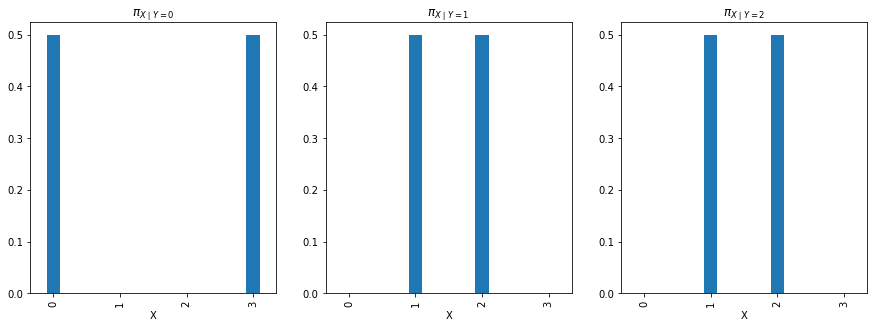

In [64]:
df = pd.DataFrame({
    'X': [0,1,2,3,0,1,2,3,0,1,2,3],
    'Y': [0,0,0,0,1,1,1,1,2,2,2,2],
    '$\pi_{X \mid Y}$': [1/2,0,0,1/2, 0,1/2,1/2,0, 0,1/2,1/2,0]
})

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df[df['Y'] == 0].drop('Y', axis=1).plot(ax=axs[0], kind='bar', width=0.2, x='X', legend=None).set_title('$\pi_{X \mid Y=0}$')
df[df['Y'] == 1].drop('Y', axis=1).plot(ax=axs[1], kind='bar', width=0.2, x='X', legend=None).set_title('$\pi_{X \mid Y=1}$')
df[df['Y'] == 2].drop('Y', axis=1).plot(ax=axs[2], kind='bar', width=0.2, x='X', legend=None).set_title('$\pi_{X \mid Y=2}$')

> (p. 174) Oefening 2: De bivariate cumulatieve verdelingsfunctie $\Phi_{X,Y}(x,y)$ wordt gedefinieerd als $\Phi_{X,Y}(x,y) = P(\{\omega \mid X(\omega) \leq x \text{ en } Y(\omega) \leq y\})$. Bepaal deze functie voor het depressie-voorbeeld van p. 170. (hint: werk hiervoor met de tabelvoorstelling met twee ingangen van de bivariate kansmassafunctie).

- $X$: dosis
- $Y$: graad depressie
- gegeven: $\pi_{X,Y}$

| $X$         | $Y=0$ | $Y=1$ | $Y=2$ | $Y=3$ |
|-------------|-------|-------|-------|-------|
| $30$        |$0.12$ |$0.08$ |$0.06$ |$0.07$ |
| $20$        |$0.04$ |$0.16$ |$0.11$ |$0.02$ |
| $10$        |$0.03$ |$0.12$ |$0.15$ |$0.04$ |

- $\Phi_{X,Y}$
    - vertrek van linksonder ($X$ van klein naar groot), niet linksboven
    - kolom $Y=0$ en rij $X=10$ zijn het gemakkelijkste
    - daarna $\Phi_{X,Y}(20,1)$
    - enz...
    - vb.: $\Phi_{X,Y}(20,2) = \Phi_{X,Y}(20,1) + \pi_{X,Y}(10,2) + \pi_{X,Y}(20,2)$
    - dubbelcheck: waarde rechtsboven moet 1 zijn
    
| $X$         | $Y=0$ | $Y=1$ | $Y=2$ | $Y=3$ |
|-------------|-------|-------|-------|-------|
| $30$        |$0.19$ |$0.55$ |$0.87$ |$1.00$ |
| $20$        |$0.07$ |$0.35$ |$0.61$ |$0.67$ |
| $10$        |$0.03$ |$0.15$ |$0.30$ |$0.34$ |

> (p. 174) Als het muntstuk eerlijk is en de uitkomsten van de 5 worpen onafhankelijk van mekaar zijn, kan gemakkelijk de volgende bivariate kansmassafunctie voor $(X,Y)$ worden afgeleid, gebruik makend van de regel van Laplace (oefening!).

- $X=3, Y=0 \implies$ KKK MM $\implies \pi_{X,Y}(3,0) = \frac{1}{2^5} = \frac{1}{32}$
- $X=3, Y=1 \implies$ KKK KM of KKK MK $\implies \pi_{X,Y}(3,1) = \frac{2}{2^5} = \frac{1}{16}$
- ...

> (p. 175) Oefening: Controleer verder dat steeds geldt: $\pi_{X,Y}(x_j,y_{j'}) = \pi_X(x_j) \pi_Y(y_{j'})$.

- $\pi_{X,Y}(0, 0) = \pi_X(0) \pi_Y(0) = \frac{1}{8} \frac{1}{4} = \frac{1}{32}$ (OK)
- $\pi_{X,Y}(0, 1) = \pi_X(0) \pi_Y(1) = \frac{1}{8} \frac{1}{2} = \frac{1}{16}$ (OK)
- ...

> (p. 176) Oefening: Ga na dat hier ook geldt voor alle waarden $(x_j, y_{j'})$ van $(X,Y)$ dat $\Phi_{X,Y}(x_j, y_{j'}) = \Phi_X(x_j) \times \Phi_Y(y_{j'})$.

- gegeven
    - $\pi_X(0) = \frac{1}{8}$
    - $\pi_X(1) = \frac{3}{8}$
    - $\pi_X(2) = \frac{3}{8}$
    - $\pi_X(3) = \frac{1}{8}$
    - $\pi_Y(0) = \frac{1}{4}$
    - $\pi_Y(1) = \frac{1}{2}$
    - $\pi_Y(2) = \frac{1}{4}$
- $\Phi_X$
    - $\Phi_X(0) = \frac{1}{8} = \frac{4}{32}$
    - $\Phi_X(1) = \frac{4}{8} = \frac{16}{32}$
    - $\Phi_X(2) = \frac{7}{8} = \frac{28}{32}$
    - $\Phi_X(3) = \frac{8}{8} = \frac{32}{32}$
- $\Phi_Y$
    - $\Phi_Y(0) = \frac{1}{4} = \frac{8}{32}$
    - $\Phi_Y(1) = \frac{3}{4} = \frac{24}{32}$
    - $\Phi_Y(2) = \frac{4}{4} = \frac{32}{32}$
- $\Phi_{X,Y}$
    - opm.: $\Phi_X$ = kolom $Y=2$
    - opm.: $\Phi_Y$ = rij $X=3$

| $X$ | $Y=0$ | $Y=1$ | $Y=2$ |
|-----|-------|-------|-------|
| $3$ |$8/32$ |$24/32$|$32/32$|
| $2$ |$7/32$ |$21/32$|$28/32$|
| $1$ |$4/32$ |$12/32$|$16/32$|
| $0$ |$1/32$ | $3/32$| $4/32$|


- check
    - $\Phi_{X,Y}(0,0) = \Phi_X(0) \Phi_Y(0) = \frac{4}{32} \frac{8}{32} = \frac{32}{32^2} = \frac{1}{32}$ -> OK
    - ...
    - $\Phi_{X,Y}(2,1) = \Phi_X(2) \Phi_Y(1) = \frac{28}{32} \frac{24}{32} = \frac{672}{32^2} = \frac{21}{32}$ -> OK
    - ...

> (p. 176) Bewijs: oefening.

  - cf. bewijs p. 125
  - $(1) \implies (2)$
    - $\pi_{X,Y}(x,y) = \pi_X(x) \pi_Y(y)$
    - $\iff \frac{\pi_{X,Y}(x,y)}{\pi_X(x)} = \frac{\pi_X(x) \pi_Y(y)}{\pi_X(x)}$ (deel door $\pi_X$)
    - $\iff \pi_{Y \mid X=x}(y) = \pi_Y(y)$ (definitie + schrappen)
  - $(2) \implies (3)$
    - $\pi_{Y \mid X=x}(y) = \pi_Y(y)$
    - $\iff \frac{\pi_{X,Y}(x, y)}{\pi_X(x)} = \pi_Y(y)$ (definitie)
    - $\iff \frac{\pi_{X,Y}(x, y)}{\pi_Y(y)} = \pi_X(x)$
    - $\iff \pi_{X \mid Y=y}(x) = \pi_X(x)$ (definitie)
  - $(3) \implies (1)$
    - $\pi_{X \mid Y=y}(x) = \pi_X(x)$
    - $\iff \frac{\pi_{X,Y}(x, y)}{\pi_Y(y)} = \pi_X(x)$
    - $\iff \pi_{X,Y}(x, y) = \pi_X(x)\pi_Y(y)$

> (p. 177) Oefening: Zijn $(X,Y)$ onafhankelijk
> - in voorbeeld 1 op p. 166?
> - in voorbeeld 2 op p. 170?
>
> Geef daarbij precies aan waarom dit al dan het geval is.

  - vb1
    - afhankelijk
    - $\pi_{X,Y}(0,0) = \frac{1}{8} \neq \pi_X(0) \pi_Y(0) = \frac{1}{8} \cdot \frac{2}{8}$
    - $X=0 \implies Y=0$
    - $X=3 \implies Y=0$
  - vb2
    - afhankeliijk
    - $\pi_{X,Y}(10,0) = 0.03 \neq \pi_X(10) \pi_Y(0) = 0.34 \cdot 0.19$

> (p. 183) Oefening. Bereken voor voorbeeld 2 van p. 170 ook de conditionele kansmassafuncties $\pi_{X \mid Y=y_{j'}}$, samen met de bijhorende conditionele populatiegemiddelden en conditionele populatievarianties. Werk daarbij op 4 decimalen nauwkeurig.

- gegeven: $\pi_{X,Y}$

| $X$         | $Y=0$ | $Y=1$ | $Y=2$ | $Y=3$ | rijtotal |
|-------------|-------|-------|-------|-------|----------|
| $30$        |$0.12$ |$0.08$ |$0.06$ |$0.07$ | $0.33$
| $20$        |$0.04$ |$0.16$ |$0.11$ |$0.02$ | $0.33$
| $10$        |$0.03$ |$0.12$ |$0.15$ |$0.04$ | $0.34$
| kolomtotaal |$0.19$ |$0.36$ |$0.32$ |$0.13$ | $1.00$

- $\pi_{X \mid Y=y}$
    - $= \frac{\pi_{X,Y}(x, y)}{\pi_Y(y)}$

| $X$         | $Y=0$ | $Y=1$ | $Y=2$ | $Y=3$ |
|-------------|-------|-------|-------|-------|
| $30$        |$0.6316$ |$0.2222$ |$0.1875$ |$0.5385$
| $20$        |$0.2105$ |$0.4444$ |$0.3438$ |$0.1538$
| $10$        |$0.1579$ |$0.3333$ |$0.4688$ |$0.3077$
| kolomtotaal |$1.0000$ |$1.0000$ |$1.0000$ |$1.0000$

  - $E[X \mid Y=y]$
    - $E[X \mid Y=0]$
      - $= \sum_j x \pi_{X \mid Y=0}(x)$
      - $\approx 10 \cdot 0.1579 + 20 \cdot 0.2105 + 30 \cdot 0.6316$
      - $= 24.7370$
    - $E[X \mid Y=1] \approx 18.8870$
    - $E[X \mid Y=2] \approx 17.1890$
    - $E[X \mid Y=3] \approx 22.3080$
  - $E[X^2 \mid Y=y]$
    - $E[X^2 \mid Y=0]$
      - $= \sum_j x^2 \pi_{X \mid Y=0}(x)$
      - $\approx 10^2 \cdot 0.1579 + 20^2 \cdot 0.2105 + 30^2 \cdot 0.6316$
      - $= 668.4300$
    - $E[X^2 \mid Y=1] \approx 411.0700$
    - $E[X^2 \mid Y=2] \approx 353.1500$
    - $E[X^2 \mid Y=3] \approx 576.9400$
  - $\sigma_{X \mid Y=y}^2$
    - $\sigma_{X \mid Y=0}^2$
      - $= E[X^2 \mid Y=0] - E[X \mid Y=0]^2$
      - $\approx 668.4300 - 24.7370^2$
      - $= 56.5108$
    - $\sigma_{X \mid Y=1}^2 \approx 54.3512$
    - $\sigma_{X \mid Y=2}^2 \approx 57.6883$
    - $\sigma_{X \mid Y=3}^2 \approx 79.2931$

> (p. 184 e.v.) Alle bewijzen van eigenschappen laten we daarbij als oefening.

  - $\sigma_{XX}$ (cf. bewijs p. 68)
    - $= E[(X - \mu_X)(X - \mu_X)]$ (definitie covariantie)
    - $= E[(X - \mu_X)^2]$ (definitie)
    - $= \sigma_X^2$
  - $\sigma_{XY}$ (cf. bewijs p. 67)
    - $= E[(X - \mu_X)(Y - \mu_Y)]$ (definitie covariantie)
    - $= E[XY - X\mu_Y - Y\mu_X + \mu_X \mu_Y]$ (distributief)
    - $= E[XY] - E[X\mu_Y] - E[Y\mu_X] + E[\mu_X \mu_Y]$ (eigenschap verwachte waarde)
    - $= E[XY] - \mu_Y E[X] - \mu_X E[Y] + \mu_X \mu_Y$ (eigenschap verwachte waarde)
    - $= E[XY] - \mu_Y \mu_X - \mu_X \mu_Y + \mu_X \mu_Y$ (want $\mu_X = E[X]$)
    - $= E[XY] - \mu_X \mu_Y$ (vereenvoudig)
  - $\sigma_{XY}$ (cf. bewijs p. 68)
    - $= E[(X - \mu_X)(Y - \mu_Y)]$ (definitie covariantie)
    - $= E[(Y - \mu_Y)(X - \mu_X)]$ (commutatief)
    - $= \sigma_{YX}$
  - $\sigma_{aX+b\;Y}$ (cf. bewijs p. 69)
    - $= E[(aX+b - \mu_{aX+b})(Y - \mu_Y)]$ (definitie covariantie)
    - $= E[(aX+b - (a\mu_X+b))(Y - \mu_Y)]$ (eigenschap gemiddelde)
    - $= E[(aX - a\mu_X))(Y - \mu_Y)]$ (vereenvoudig)
    - $= E[a(X - \mu_X))(Y - \mu_Y)]$ (distributief)
    - $= aE[(X - \mu_X))(Y - \mu_Y)]$ (eigenschap verwachte waarde)
    - $= a\sigma_{XY}$ (definitie covariante)
  - $\sigma_{\zeta_X \zeta_Y}$
    - $= E[\zeta_X \zeta_Y] - \mu_{\zeta_X} \mu_{\zeta_Y}$ (chiastische eigenschap)
    - $= E[\zeta_X \zeta_Y]$
  - $\rho_{XY}$ (cf. bewijs p. 70)
    - $= \sigma_{\zeta_X \zeta_Y}$ (definitie correlatie)
    - $= E[\zeta_X \zeta_Y]$ (zie hierboven)
    - $= E[\frac{X - \mu_X}{\sigma_X} \frac{Y - \mu_Y}{\sigma_Y}]$ (definitie zeta-transformatie)
    - $= \frac{1}{\sigma_X \sigma_Y} E[(X - \mu_X)(Y - \mu_Y)]$ (eigenschap verwachte waarde)
    - $= \frac{\sigma_{XY}}{\sigma_X \sigma_Y}$ (definitie covariantie)
  - $\rho_{XX}$ (cf. bewijs p. 70)
    - $= \frac{\sigma_{XX}}{\sigma_X \sigma_X}$ (eigenschap correlatie)
    - $= \frac{\sigma_X^2}{\sigma_X^2}$ (eigenschap covariantie)
    - $= 1$
  - $\rho_{XY}$ (cf. bewijs p. 70)
    - $= \frac{\sigma_{XY}}{\sigma_X \sigma_Y}$ (eigenschap correlatie)
    - $= \frac{\sigma_{YX}}{\sigma_X \sigma_Y}$ (eigenschap covariantie)
    - $= \frac{\sigma_{YX}}{\sigma_Y \sigma_X}$ (commutatief)
    - $= \rho_{YX}$ (eigenschap correlatie)
  - $\rho_{\pm aX+b\;Y}$ met $a > 0$ (cf. bewijs p. 70)
    - $= \frac{\sigma_{\pm aX+b\;Y}}{\sigma_{\pm aX+b} \sigma_Y}$ (eigenschap correlatie)
    - $= \frac{\pm a\sigma_{XY}}{\sigma_{\pm aX+b} \sigma_Y}$ (eigenschap covariantie)
    - $= \frac{\pm a\sigma_{XY}}{|a|\sigma_X \sigma_Y}$ (eigenschap standaarddeviatie)
    - $= \frac{\pm a\sigma_{XY}}{a\sigma_X \sigma_Y}$ (want $a > 0$)
    - $= \pm \frac{\sigma_{XY}}{\sigma_X \sigma_Y}$ (schrap $a$)
    - $= \pm \rho_{XY}$ (eigenschap correlatie)
  - $-1 \leq \rho_{XY} \leq 1$ (cf. bewijs p. 70)
    - lemma: $E[\zeta_X^2]$
      - $= E[(\frac{X-\mu_X}{\sigma_X})^2]$ (definitie zeta-transformatie)
      - $= \frac{1}{\sigma_X^2} E[(X-\mu_X)^2]$ (eigenschap verwachte waarde)
      - $= \frac{1}{\sigma_X^2} E[X^2 -2 X\mu_X + \mu_X^2]$ (merkwaardig product)
      - $= \frac{1}{\sigma_X^2} (E[X^2] - E[2 X\mu_X] + E[\mu_X^2])$ (splits som)
      - $= \frac{1}{\sigma_X^2} (E[X^2] - 2\mu_XE[X] + \mu_X^2)$ (eigenschap verwachte waarde)
      - $= \frac{1}{\sigma_X^2} (E[X^2] - 2\mu_X^2 + \mu_X^2)$ (want $\mu_X = E[X]$)
      - $= \frac{1}{\sigma_X^2} (E[X^2] - \mu_X^2)$ (vereenvoudig)
      - $= \frac{\sigma_X^2}{\sigma_X^2}$ (chiastische eigenschap)
      - $= 1$
    - $E[(\zeta_X \pm \zeta_Y)^2] \geq 0$ (want som van kwadraten)
    - $\iff E[\zeta_X^2 + \zeta_Y^2 \pm 2\zeta_X \zeta_Y] \geq 0$ (merkwaardig product)
    - $\iff E[\zeta_X^2] + E[\zeta_Y^2] \pm 2E[\zeta_X \zeta_Y] \geq 0$ (spits som)
    - $\iff E[\zeta_X^2] + E[\zeta_Y^2] \pm 2\rho_{XY} \geq 0$ (eigenschap correlatie)
    - $\iff 1 + 1 \pm 2\rho_{XY} \geq 0$ (lemma)
    - $\iff -1 \leq \rho_{XY} \leq 1$ (vereenvoudig)
  - $-\sigma_X \sigma_Y \leq \sigma_{XY} \leq \sigma_X \sigma_Y$ (cf. bewijs p. 71)
    - $-1 \leq \rho_{XY} \leq 1$ (zie hierboven)
    - $\iff -1 \leq \frac{\sigma_{XY}}{\sigma_X \sigma_Y} \leq 1$ (eigenschap correlatie)
    - $\iff -\sigma_X \sigma_Y \leq \sigma_{XY} \leq \sigma_X \sigma_Y$ (vermenigvuldig met $\sigma_X \sigma_Y > 0$)
  - $\rho_{XY} = \mp 1$ (cf. bewijs p. 71) 
    - $\iff E([\zeta_X \pm \zeta_Y)^2] = 2 \pm 2\rho_{XY} = 0$ (zie hierboven)
    - $\iff P[\zeta_X = \pm \zeta_Y]=1$ (magic?)

> (p. 185) Oefening 1: Bereken eveneens de populatiecovariantie $\sigma_{XY}$ voor voorbeeld 1 van p. 166.

  - gegeven: $\pi_{X,Y}$ (p. 168)
  - $\mu_X = 0 \cdot \frac{1}{8} + 1 \cdot \frac{3}{8} + 2 \cdot \frac{3}{8} + 3 \cdot \frac{1}{8} = \frac{12}{8} = 1.5$
  - $\mu_Y = 0 \cdot \frac{2}{8} + 1 \cdot \frac{4}{8} + 2 \cdot \frac{2}{8} = \frac{8}{8} = 1$
  - $(x_j - \mu_X)(y_{j'} - \mu_Y) \pi_{X,Y}(x_j, y_{j'})$
    - $(0-1.5)(0-1) \frac{1}{8} = \frac{3}{16}$
    - $(0-1.5)(1-1) 0 = 0$
    - $(0-1.5)(2-1) 0 = 0$
    - $(1-1.5)(0-1) 0 = 0$
    - $(1-1.5)(1-1) \frac{2}{8} = 0$
    - $(1-1.5)(2-1) \frac{1}{8} = -\frac{1}{16}$
    - $(2-1.5)(0-1) 0 = 0$
    - $(2-1.5)(1-1) \frac{2}{8} = 0$
    - $(2-1.5)(2-1) \frac{1}{8} = \frac{1}{16}$
    - $(3-1.5)(0-1) \frac{1}{8} = -\frac{3}{16}$
    - $(3-1.5)(1-1) 0 = 0$
    - $(3-1.5)(2-1) 0 = 0$
  - $\sigma_{XY}$
  - $= E[(X-\mu_X)(Y-\mu_Y)]$
  - $= \sum_j (x_j -\mu_X)(y_{j'} - \mu_Y) \pi_{X,Y}(x_j, y_{j'})$
  - $= \frac{3-1+1-3}{16}$
  - $=0$

> (p. 185) Oefening 2: Doe hetzelfde als oefening 1 maar nu voor het geval van een oneerlijk muntstuk met P(kruis)=0.70.

- gegeven: $\pi_{X,Y}$ (zie oefening 1a p. 169)

| $X$ | $Y=0$ | $Y=1$ | $Y=2$ | rijtotaal |
|-----|-------|-------|-------|-----------|
| $3$ | $0.343$|$0$|  $0$  | $0.343$
| $2$ |  $0$  | $0.294$ | $0.147$ | $0.441$
| $1$ |  $0$  | $0.126$ | $0.063$ | $0.189$
| $0$ | $0.027$ | $0$ | $0$ | $0.027$
| kolomtotaal | $0.37$ | $0.42$ | $0.21$ | $1$

- $\mu_X = 0 \cdot 0.027 + 1 \cdot 0.189 + 2 \cdot 0.441 + 3 \cdot 0.343 = 2.1$
- $\mu_Y = 0 \cdot 0.37 + 1 \cdot 0.42 + 2 \cdot 0.21 = 0.84$
- $(x_j - \mu_X)(y_{j'} - \mu_Y) \pi_{X,Y}(x_j, y_{j'})$
    - $(0-2.1)(0-0.84) 0.027 \approx 0.0476$
    - $(0-2.1)(1-0.84) 0 = 0$
    - $(0-2.1)(2-0.84) 0 = 0$
    - $(1-2.1)(0-0.84) 0 = 0$
    - $(1-2.1)(1-0.84) 0.126 \approx -0.0222$
    - $(1-2.1)(2-0.84) 0.063 \approx -0.0804$
    - $(2-2.1)(0-0.84) 0 = 0$
    - $(2-2.1)(1-0.84) 0.294 \approx -0.0047$
    - $(2-2.1)(2-0.84) 0.147 \approx -0.0171$
    - $(3-2.1)(0-0.84) 0.343 \approx -0.2593$
    - $(3-2.1)(1-0.84) 0 = 0$
    - $(3-2.1)(2-0.84) 0 = 0$
- $\sigma_{XY}$
- $= E[(X-\mu_X)(Y-\mu_Y)]$
- $= \sum_j (x_j -\mu_X)(y_{j'} - \mu_Y) \pi_{X,Y}(x_j, y_{j'})$
- $\approx -0.3361$

> (p. 186) Oefening 3: Los oefeningen 1 en 2 op p. 185 opnieuw op maar nu met de net vermelde formule.

  - $\sigma_{XY} = E[XY] - \mu_X \mu_Y$
  - (a) oefening 1
    - $x_j y_{j'} \pi_{X,Y}(x_j, y_{j'})$
      - $0 \cdot 0 \cdot \frac{1}{8} = 0$
      - $0 \cdot 1 \cdot 0 = 0$
      - $0 \cdot 2 \cdot 0 = 0$
      - $1 \cdot 0 \cdot 0 = 0$
      - $1 \cdot 1 \cdot \frac{2}{8} = \frac{2}{8}$
      - $1 \cdot 2 \cdot \frac{1}{8} = \frac{2}{8}$
      - $2 \cdot 0 \cdot 0 = 0$
      - $2 \cdot 1 \cdot \frac{2}{8} = \frac{4}{8}$
      - $2 \cdot 2 \cdot \frac{1}{8} = \frac{4}{8}$
      - $3 \cdot 0 \cdot \frac{1}{8} = 0$
      - $3 \cdot 1 \cdot 0 = 0$
      - $3 \cdot 2 \cdot 0 = 0$
    - $E[XY]$
    - $= \sum_j x_j y_{j'} \pi_{X,Y}(x_j, y_{j'})$
    - $= \frac{2+2+4+4}{8}$
    - $= \frac{12}{8}$
    - $= 1.5$
    - $\sigma_{XY}$
    - $= E[XY] - \mu_X \mu_Y$
    - $= 1.5 - 1.5 \cdot 1$
    - $= 0$
  - (b) oefening 2
    - $x_j y_{j'} \pi_{X,Y}(x_j, y_{j'})$
      - $0 \cdot 0 \cdot 0.027 = 0$
      - $0 \cdot 1 \cdot 0 = 0$
      - $0 \cdot 2 \cdot 0 = 0$
      - $1 \cdot 0 \cdot 0 = 0$
      - $1 \cdot 1 \cdot 0.126 = 0.126$
      - $1 \cdot 2 \cdot 0.063 = 0.126$
      - $2 \cdot 0 \cdot 0 = 0$
      - $2 \cdot 1 \cdot 0.294 = 0.588$
      - $2 \cdot 2 \cdot 0.147 = 0.588$
      - $3 \cdot 0 \cdot 0.343 = 0$
      - $3 \cdot 1 \cdot 0 = 0$
      - $3 \cdot 2 \cdot 0 = 0$
    - $E[XY] = \sum_j x_j y_{j'} \pi_{X,Y}(x_j, y_{j'}) = 1.428$
    - $\sigma_{XY}$
    - $= E[XY] - \mu_X \mu_Y$
    - $= 1.428 - 2.1 \cdot 0.84$
    - $= -0.336$

> (p. 189) Het is vrij gemakkelijk om aan te tonen (oefening!) dat voor dit voorbeeld geldt dat $\rho_{XY}=0$ daar waar $X$ en $Y$ **niet** statistisch onafhankelijk zijn.

  - afhankelijk: $\pi_{X,Y}(1,1) = 0 \neq \pi_X(1) \pi_Y(1) = \frac{1}{3} \frac{1}{3}$
  - $\mu_X = 2$
  - $\mu_Y = \frac{1}{3}$
  - $E[XY] = 2 \cdot 1 \cdot \frac{1}{3} = \frac{2}{3}$
  - $\sigma_{XY}$
  - $= E[XY] - \mu_X \mu_Y$
  - $= \frac{2}{3} - 2 \cdot \frac{1}{3}$
  - $= 0$
  - $\rho_{XY}$
  - $= \frac{\sigma_{XY}}{\sigma_{X} \sigma_{Y}}$
  - $= \frac{0}{\sigma_{X} \sigma_{Y}}$
  - $= 0$

> (p. 189 e.v.) Opnieuw beperken we ons tot een vermelding van de belangrijkste eigenschappen en worden bewijzen (voor het geval $X$ en $Y$ een eindig waardegebied hebben) overgelaten aan de lezer.

  - $\mu_{X+Y}$ (cf. bewijs p. 88)
    - $= \sum_j \sum_{j'} (x_j + y_{j'}) \pi_{XY}(x_j, y_{j'})$ (definitie gemiddelde)
    - $= \sum_j \sum_{j'} x_j \pi_{XY}(x_j, y_{j'}) + \sum_j \sum_{j'} y_{j'} \pi_{XY}(x_j, y_{j'})$ (distributiviteit + splits som)
    - $= \sum_j x_j \sum_{j'} \pi_{XY}(x_j, y_{j'}) + \sum_{j'} y_{j'} \sum_j \pi_{XY}(x_j, y_{j'})$ (constante factoren buiten)
    - $= \sum_j x_j \pi_{X}(x_j) + \sum_{j'} y_{j'} \pi_{Y}(y_{j'})$ (definitie marginale kansmassafuncties)
    - $= \mu_X + \mu_Y$ (definitie gemiddelde)
  - $\sigma_{X+Y}^2$ (cf. bewijs p. 89)
    - $= E[((X+Y) - \mu_{X+Y})^2]$ (definitie variantie)
    - $= E[((X+Y) - \mu_X - \mu_Y)^2]$ (eigenschap gemiddelde)
    - $= E[((X - \mu_X) + (Y- \mu_Y))^2]$ (herschik)
    - $= E[(X - \mu_X)^2 + (Y- \mu_Y)^2 + 2(X - \mu_X)(Y- \mu_Y)]$ (merkwaardig product)
    - $= E[(X - \mu_X)^2] + E[(Y- \mu_Y)^2] + 2E[(X - \mu_X)(Y- \mu_Y)]$ (eigenschap verwachte waarde)
    - $= \sigma_X^2 + \sigma_Y^2 + 2\sigma_{XY}$ (definitie (co)variantie)
  - $\sigma_{X+Y\;W}$ (cf. bewijs p. 89)
    - $= E[((X+Y) - \mu_{X+Y})(W - \mu_W)]$ (definitie covariantie)
    - $= E[((X+Y) - \mu_X - \mu_Y)(W - \mu_W)]$ (eigenschap gemiddelde)
    - $= E[((X - \mu_X) + (Y- \mu_Y))(W - \mu_W)]$ (herschik)
    - $= E[(X - \mu_X)(W - \mu_W) + (Y- \mu_Y)(W - \mu_W)]$ (distributiviteit)
    - $= E[(X - \mu_X)(W - \mu_W)] + E[(Y- \mu_Y)(W - \mu_W)]$ (eigenschap verwachte waarde)
    - $= \sigma_{XW} + \sigma_{YW}$ (definitie covariantie)
  - $E\left[a_0 + \sum_{k=1}^p a_k X_k \right]$ (cf. bewijs p. 91)
    - lemma: $E[X+Y] = E[X] + E[Y]$ (zie eigenschap $\mu_{X+Y}$ hierboven)
    - bewijs door volledige inductie
      - basisstap
        - te bewijzen: formule geldig voor $p=0$
        - $E\left[a_0 + \sum_{k=1}^p a_k X_k \right] = a_0 + a_k \sum_{k=1}^p E[X_k]$
        - $E[a_0] = a_0$ ($p=0$ invullen)
        - $a_0 = a_0$ (verwachte waarde van constante is constante zelf)
        - conclusie: formule geldig voor $p=0$
      - inductiestap
        - assumptie: formule geldig voor $p$
          - $E\left[a_0 + \sum_{k=1}^p a_k X_k \right] = a_0 + a_k \sum_{k=1}^p E[X_k]$
        - te bewijzen: formule geldig voor $p+1$
        - $E[a_0 + \sum_{k=1}^{p+1} a_k X_k]$
        - $E[a_0 + \sum_{k=1}^{p} a_k X_k + a_{p+1} X_{p+1}]$
        - $E[a_0 + \sum_{k=1}^{p} a_k X_k] + E[a_{p+1} X_{p+1}]$ (lemma met $Y=a_{p+1} X_{p+1}$)
        - $E[a_0 + \sum_{k=1}^{p} a_k X_k] + a_{p+1} E[X_{p+1}]$ (eigenschap verwachte waarde)
        - $a_0 + a_k \sum_{k=1}^p E[X_k] + a_{p+1} E[X_{p+1}]$ (assumptie)
        - $a_0 + a_k \sum_{k=1}^{p+1} E[X_k]$ (consolideer som)
        - conclusie: formule geldig voor $p \implies$ geldig voor $p+1$
      - conclusie: formule geldig $\forall p \in \mathbb{N}$
  - $\sigma_{a_0 + \sum_{k=1}^p a_k X_k\;\;b_0 + \sum_{k'=1}^p b_{k'} Y_{k'}} = \sum_{k=1}^p \sum_{k'=1}^p a_k b_{k'} \sigma_{X_k Y_{k'}}$ (cf. bewijs p. 91)
    - $E[(a_0 + \sum_{k=1}^p a_k X_k - E[a_0 + \sum_{k=1}^p a_k X_k])(b_0 + \sum_{k'=1}^p b_{k'} Y_{k'} - E[b_0 + \sum_{k'=1}^p b_{k'} Y_{k'}])]$ (definitie covariantie)
    - $E[(a_0 + \sum_{k=1}^p a_k X_k - a_0 - \sum_{k=1}^p a_k E[X_k])(b_0 + \sum_{k'=1}^p b_{k'} Y_{k'} - b_0 - \sum_{k'=1}^p b_{k'} E[Y_{k'}])]$ (eigenschap verwachte waarde)
    - $E[(\sum_{k=1}^p a_k X_k - \sum_{k=1}^p a_k E[X_k])(\sum_{k'=1}^p b_{k'} Y_{k'} - \sum_{k'=1}^p b_{k'} E[Y_{k'}])]$ (vereenvoudig)
    - $E[(\sum_{k=1}^p a_k (X_k - E[X_k]))(\sum_{k'=1}^p b_{k'} (Y_{k'} - E[Y_{k'}]))]$ (sommen samenvoegen)
    - $E[\sum_{k=1}^p \sum_{k'=1}^p a_k b_{k'} (X_k - E[X_k])(Y_{k'} - E[Y_{k'}])]$ (eigenschap sommatie)
    - $\sum_{k=1}^p \sum_{k'=1}^p a_k b_{k'} E[(X_k - E[X_k])(Y_{k'} - E[Y_{k'}])]$ (eigenschap verwachte waarde)
    - $\sum_{k=1}^p \sum_{k'=1}^p a_k b_{k'} \sigma_{X_k Y_{k'}}$ (definitie covariantie)
  - $\sigma_{a_0 + \sum_{k=1}^p a_k X_k}^2$ (cf. bewijs p. 91)
    - $= \sigma_{a_0 + \sum_{k=1}^p a_k X_k\;\;a_0 + \sum_{k=1}^p a_k X_k}$ (eigenschap variantie)
    - $= \sum_{k=1}^p \sum_{k'=1}^p a_k a_{k'} \sigma_{X_k X_k}$ (zie bewijs covariantie)
    - $= \sum_{k=1}^p a_k a_k \sigma_{X_k X_k} + \sum_{k < k'} a_k a_{k'} \sigma_{X_k X_{k'}} + \sum_{k > k'} a_k a_{k'} \sigma_{X_k X_{k'}}$ (splits som in deel $k=k'$, deel $k<k'$ en deel $k>k'$)
    - $= \sum_{k=1}^p a_k^2 \sigma_{X_k}^2 + 2\sum_{k < k'} a_k a_{k'} \sigma_{X_k X_{k'}}$ (twee laatste delen zijn gelijk door commutativiteit)

> (p. 189-190) Oefening: Een differentieel psycholoog wil van proefpersonen twee intelligentietests, $T_1$ en $T_2$, afnemen. Hij neemt aan dat proefpersonen hoger zullen scoren op de twee tests naarmate ze hoger scoren inzake algemene intelligentie, $G$. Meer bepaald neemt de differentieel psycholoog aan dat:
> - $\zeta_{T_1} = 0.80G + E_1$
> - $\zeta_{T_2} = 0.50G + E_2$
>
> waarbij 0.80 (resp. 0.50) aangeeft in welke mate algemene intelligentie de score op test $T_1$ (resp. $T_2$) beinvloedt en waarbij $E_1$ (resp. $E_2$) een toevalsvariabele is die specifieke elementen weergeeft welke enkel meespelen in test $T_1$ (resp. $T_2$). De psycholoog neemt verder aan dat
> - $\mu_G = 0, \sigma_G^2=1$
> - $\rho_{GE_1} = \rho_{GE_2} = \rho_{E_1 E_2} = 0$.
> 
> Toon aan dat in dat geval geldt dat:
> - (a) $\rho_{T_1 G} = 0.80$
> - (b) $\sigma_{E_2}^2 = 0.75$
> - (c) $\rho_{T_1 T_2} = 0.40$

  - (a)
    - $\rho_{T,G}$
    - $= \sigma_{\zeta_{T_1}\zeta_G}$ (definitie correlatie)
    - $= \sigma_{\zeta_{T_1}G}$ (want $\zeta_G = G$)
    - $= \sigma_{0.80G + E_1\;G}$ (substitutie)
    - $= \sigma_{0.80GG} + \sigma_{GE_1}$ (eigenschap covariantie)
    - $= 0.80\sigma_{GG} + 0$ (eigenschap covariantie + gegeven)
    - $= 0.80\sigma_G^2$
    - $= 0.80$
  - (b)
    - $\sigma_{\zeta_{T_2}}^2 = 1$
    - $\iff \sigma_{0.50G + E_2}^2 =1$ (substitutie)
    - $\iff \sigma_{0.50G}^2 + 2\sigma_{0.50G\;E_2} + \sigma_{E_2}^2 =1$ (eigenschap variantie)
    - $\iff 0.50^2\sigma_{G}^2 + 2 \cdot 0.50 \sigma_{GE_2} + \sigma_{E_2}^2 =1$ (eigenschap (co)variantie)
    - $\iff 0.25 \cdot 1 + 0 + \sigma_{E_2}^2 = 1$ (want $\rho_{GE_2} = 0 \implies \sigma_{GE_2} = 0$)
    - $\iff \sigma_{E_2}^2 = 1 - 0.25 = 0.75$
  - (c)
    - $\rho_{T_1 T_2}$
    - $= \sigma_{\zeta_{T_1}\zeta_{T_2}}$ (definitie correlatie)
    - $= \sigma_{0.80G+E_1\;0.50G+E_2}$ (substitutie)
    - $= 0.80 \cdot 0.50 \sigma_{GG} + 0.80\sigma_{GE_2} + 0.50\sigma_{GE_1} + \sigma_{E_1 E_2}$ (eigenschap covariantie)
    - $= 0.40 \sigma_G^2 + 0 + 0 + 0$ (want $\rho_{XY} = 0 \implies \sigma_{XY} = 0$)
    - $= 0.40$

### Steekproef - populatie

> (p. 199) Uit het *iid* zijn van $X_1, X_2$ en $X_3$, en met de notatie $\theta = \pi_X(1) = \pi_{X_1}(1) = \pi_{X_2}(1) = \pi_{X_3}(1)$ volgt dat de steekproevenverdeling van $\overline X$ er als volgt uit ziet (oefening!).

  - cf. oefening 1b p. 169
  - gegeven
    - $X_1, X_2, X_3$ i.i.d.
    - $\pi_{X_1}(1) = \pi_{X_2}(1) = \pi_{X_3}(1) = \theta$
    - $\pi_{X_1}(0) = \pi_{X_2}(0) = \pi_{X_3}(0) = 1 - \theta$
    - $\bar X = \frac{1}{3} \sum_i X_i$
  - $\pi_{X_1 X_2 X_3} = \pi_{X_1} \pi_{X_2} \pi_{X_3}$ (want i.i.d. dus onafhankelijk)
    - $\pi_{X_1 X_2 X_3}(0,0,0) = (1-\theta)^3 \to \bar X = \frac{0+0+0}{3} = 0$
    - $\pi_{X_1 X_2 X_3}(1,0,0) = \theta (1-\theta)^2 \to \bar X = \frac{1}{3}$
    - $\pi_{X_1 X_2 X_3}(0,1,0) = \theta (1-\theta)^2 \to \bar X = \frac{1}{3}$
    - $\pi_{X_1 X_2 X_3}(0,0,1) = \theta (1-\theta)^2 \to \bar X = \frac{1}{3}$
    - $\pi_{X_1 X_2 X_3}(1,1,0) = \theta^2 (1-\theta) \to \bar X = \frac{2}{3}$
    - $\pi_{X_1 X_2 X_3}(1,0,1) = \theta^2 (1-\theta) \to \bar X = \frac{2}{3}$
    - $\pi_{X_1 X_2 X_3}(0,1,1) = \theta^2 (1-\theta) \to \bar X = \frac{2}{3}$
    - $\pi_{X_1 X_2 X_3}(1,1,1) = \theta^3 \to \bar X = 1$
  - groeperen per waarde van $\bar X$
    - $\pi_{\bar X}(0) = (1-\theta)^3$
    - $\pi_{\bar X}(\frac{1}{3}) = 3 \cdot \theta (1-\theta)^2$
    - $\pi_{\bar X}(\frac{2}{3}) = 3 \cdot \theta^2 (1-\theta)$
    - $\pi_{\bar X}(1) = \theta^3$

> (p. 200) Oefening: Is in het voorbeeld hierboven de steekproefmediaan, $Me_x$, een zuivere schatter van $\mu_X$, (a) als het muntstuk eerlijk is; (b) als het muntstuk oneerlijk is?

  - $E[Me_X] = \mu_X$?
  - assumptie: $E[Me_X] = Me_X^*$
  - (a) eerlijk muntstuk
    - verdeling symmetrisch
    - $Me_X^* = \mu_X$
    - zuivere schatter
  - (b) oneerlijk muntstuk
    - verdeling asymmetrisch
    - $Me_X^* \neq \mu_X$
    - onzuivere schatter

> (p. 201) Is de standaardfout $\sigma_{\overline X}$ klein? Om op deze vraag een antwoord te geven moeten we $\sigma_{\overline X}$ berekenen. Hiervoor kunnen we beroep doen op de kansmassatabel van $\overline X$ op p. 199 (oefening!).

  - gegeven
    - $E[\bar X] = \theta$
  - $E[\bar{X}^2]$
  - $= 0^2 \cdot (1-\theta)^3 + \frac{1}{3}^2 \cdot 3 \cdot \theta (1-\theta)^2 + \frac{2}{3}^2 3 \cdot \theta^2 (1-\theta) + 1^2 \cdot \theta^3$
  - $= 0 + \frac{1}{3} \theta (1-\theta)^2 + \frac{4}{3} \theta^2 (1-\theta) + \theta^3$
  - $= \frac{1}{3} (\theta - 2\theta^2 + \theta^3) + \frac{4}{3} (\theta^2 - \theta^3) + \theta^3$
  - $= \frac{1}{3} \theta - \frac{2}{3} \theta^2 + \frac{1}{3} \theta^3 + \frac{4}{3} \theta^2 - \frac{4}{3} \theta^3 + \theta^3$
  - $= \frac{2}{3} \theta^2 + \frac{1}{3} \theta$
  - $\sigma_{\bar X}^2$
  - $= E[\bar{X}^2] - E[\bar X]^2$
  - $= \frac{2}{3} \theta^2 + \frac{1}{3} \theta - \theta^2$
  - $= -\frac{1}{3} \theta^2 + \frac{1}{3} \theta$
  - $= \frac{1}{3} \theta(1 - \theta)$
  - dubbelcheck
    - $\sigma_{X}^2 = E[X^2] - E[X]^2 = \theta - \theta^2 = \theta(1-\theta)$
    - $\sigma_{\bar X}^2 = \frac{1}{3} \sigma_{X}^2 = \frac{1}{3} \theta(1-\theta)$

> (p. 202) Oefening (moeilijke doordenker!): Toon aan dat voor elke $\varepsilon > 0$ geldt dat $\displaystyle \lim_{n \to \infty} P(|\overline{X}_{(n)} -\mu_X| \geq \varepsilon) = 0$.

  - gegeven
    - $\mu_{\overline{X}_{(n)}} = \mu_X$
    - $\sigma_{\overline{X}_{(n)}} = \frac{\sigma_X}{\sqrt{n}}$
    - $\forall k > 1: P(|\overline{X}_{(n)} - \mu_{\overline{X}_{(n)}}| \geq k\sigma_{\overline{X}_{(n)}}) \leq \frac{1}{k^2}$ (Tchebychev)
    - $k = \frac{\varepsilon \sqrt{n}}{\sigma_X} = \frac{\varepsilon}{\sigma_{\overline{X}_{(n)}}}$
  - te bewijzen
    - $\displaystyle \forall \varepsilon > 0: \lim_{n \to \infty} P(|\overline{X}_{(n)} -\mu_X| \geq \varepsilon) = 0$
  - bewijs
    - $\forall k > 1: P(|\overline{X}_{(n)} - \mu_{\overline{X}_{(n)}}| \geq k\sigma_{\overline{X}_{(n)}}) \leq \frac{1}{k^2}$
    - $\iff \forall k > 1: P(|\overline{X}_{(n)} - \mu_X| \geq k \frac{\sigma_X}{\sqrt{n}}) \leq \frac{1}{k^2}$ (gegevens invullen)
    - $\iff \forall \varepsilon > \frac{\sigma_X}{\sqrt{n}}: P(|\overline{X}_{(n)} - \mu_X| \geq \frac{\varepsilon \sqrt{n}}{\sigma_X} \frac{\sigma_X}{\sqrt{n}}) \leq \frac{1}{(\frac{\varepsilon \sqrt{n}}{\sigma_X})^2}$ (gegevens invullen)
    - $\iff \forall \varepsilon > \frac{\sigma_X}{\sqrt{n}}: P(|\overline{X}_{(n)} - \mu_X| \geq \varepsilon) \leq \frac{\sigma_X^2}{n\varepsilon^2}$ (vereenvoudigen)
    - $\displaystyle \iff \forall \varepsilon > \lim_{n \to \infty} \frac{\sigma_X}{\sqrt{n}}: \lim_{n \to \infty} P(|\overline{X}_{(n)} - \mu_X| \geq \varepsilon) \leq \lim_{n \to \infty} \frac{\sigma_X^2}{n\varepsilon^2}$ (limiet nemen)
    - $\displaystyle \iff \forall \varepsilon > 0: \lim_{n \to \infty} P(|\overline{X}_{(n)} - \mu_X| \geq \varepsilon) \leq 0$ (limieten uitrekenen)
    - $\displaystyle \iff \forall \varepsilon > 0: \lim_{n \to \infty} P(|\overline{X}_{(n)} - \mu_X| \geq \varepsilon) = 0$ (kansen kunnen niet negatief zijn)

> (p. 203) Deze eigenschappen gelden echter voor alle soorten toevalsvariabelen $X$ (als $X_1, X_2, X_3, \ldots$ *iid* zijn). Bewijs: oefening.

  - gegeven
    - i.i.d.
  - te bewijzen
    - (a)
      - $\overline{X}_{(n)}$ zuivere schatter van $\mu_X$
    - (b)
      - $E[(\overline{X}_{(n)} - \mu_X)^2] = \frac{\sigma_X^2}{n}$
  - bewijs
    - (a)
      - zuiver $\iff E[\overline{X}_{(n)}] = \mu_X$
      - $E[\overline{X}_{(n)}]$
      - $= E[\frac{1}{n} \sum_i X_i]$ (definitie $\overline{X}_{(n)}$)
      - $= \frac{1}{n} \sum_i E[X_i]$ (eigenschap verwachte waarde)
      - $= \frac{1}{n} \sum_i E[X]$ (identiek verdeeld)
      - $= \frac{1}{n} n E[X]$ (constante factor buiten)
      - $= E[X]$ (vereenvoudig)
      - $= \mu_X$ (definitie)
    - (b)
        - $E[(\overline{X}_{(n)} - \mu_X)^2]$
        - $= \sigma_{\overline{X}_{(n)}}^2$ (definitie variantie)
        - $= \sigma_{\frac{1}{n}\sum_i X_i}^2$ (definitie $\overline{X}_{(n)}$)
        - $= \frac{1}{n^2} \sigma_{\sum_i X_i}^2$ (eigenschap variantie)
        - $= \frac{1}{n^2} \sum_i \sigma_{X_i}^2$ (eigenschap variantie + onafhankelijk dus covarianties=0)
        - $= \frac{1}{n^2} \sum_i \sigma_X^2$ (identiek verdeeld)
        - $= \frac{1}{n^2} n \sigma_X^2$ (constante factor buiten)
        - $= \frac{\sigma_X^2}{n}$

> (p. 203) Oefening: (a) Stel dat we een eerlijke dobbelsteen opwerpen en dat de toevalsvariabele $X$ het aantal ogen aangeeft dat bovenop ligt. Wat is in dit geval de precieze getalwaarde van $\mu_X$? (b) Stel dat we de net berekende $\mu_X$-waarde even vergeten en dat we deze zouden willen schatten door onze dobbelsteen vijfmaal op te werpen en vervolgens het gemiddelde $\overline{X}_{(5)}$ te berekenen over de vijf worpen. Wat is in dat geval de precieze getalwaarde van de verwachte kwadratische fout van deze schatting, $E[(\overline{X}_{(5)} - \mu_X)^2]$?

  - $\pi_X = \frac{1}{6}$
  - (a)
    - $\mu_X$
    - $= \sum_j x_j \pi_X(x_j)$ (definitie gemiddelde)
    - $= \pi_X \sum_j x_j$ (constante functie)
    - $= \frac{1}{6} (1 + 2 + 3 + 4 + 5 + 6)$
    - $= \frac{21}{6}$
    - $= 3.5$
  - (b)
    - $E[X^2]$
    - $= \pi_X \sum_j x_j^2$
    - $= \frac{1}{6} (1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2)$
    - $= \frac{91}{6}$
    - $\sigma_X^2$
    - $= E[X^2] - E[X]^2$
    - $= \frac{91}{6} - \frac{21}{6}^2$
    - $= \frac{546}{36} - \frac{441}{36}$
    - $= \frac{105}{36}$
    - $E[(\overline{X}_{(5)} - \mu_X)^2]$
    - $= \frac{\sigma_X^2}{5}$
    - $= \frac{21}{36}$
    - $\approx 0.5833$